In [ ]:
!pip install cartiflette
!pip install geopy pandas cartopy
!pip install geopy

In [6]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [folium]


In [2]:
import pandas as pd

Récupération des données Géod'Air 2014:

In [ ]:
geodair_raw = pd.read_csv("data/raw_data/data_air_2022.csv", sep=";")
geodair_raw

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,...,54.0,53.926047,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,...,53.0,53.333492,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01021,Thionville-Garche,Périurbaine,O3,Fond,...,57.0,56.856089,µg-m3,NaN,NaN,NaN,R,1,49.394444,6.201392
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02001,Berre l'Etang,Périurbaine,O3,Fond,...,66.0,66.176223,µg-m3,NaN,NaN,NaN,R,1,43.486234,5.171939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO OCCITANIE,FR76ZAG02,ZAG MONTPELLIER,FR50225,Montpellier Liberté,Urbaine,PM2.5,Trafic,...,9.0,9.322676,µg-m3,99.0,54.0,53.0,N,-1,43.611606,3.827868
1137,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besançon Prévoyance,Urbaine,PM2.5,Fond,...,9.0,8.597722,µg-m3,98.0,100.0,98.0,R,1,47.247400,6.015419
1138,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,9.0,8.885362,µg-m3,97.0,100.0,97.0,R,1,47.510307,6.794000
1139,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,7.0,7.268856,µg-m3,99.0,100.0,99.0,R,1,46.671321,5.556620


In [ ]:
geodair_raw.columns

Index(['Date de début', 'Date de fin', 'Organisme', 'code zas', 'Zas',
       'code site', 'nom site', 'type d'implantation', 'Polluant',
       'type d'influence', 'Réglementaire', 'type d'évaluation',
       'type de valeur', 'valeur', 'valeur brute', 'unité de mesure',
       'taux de saisie', 'couverture temporelle', 'couverture de données',
       'code qualité', 'validité', 'Latitude', 'Longitude'],
      dtype='object')

In [37]:
geodair = pd.read_csv("data/processed_data/geodair_2022_villes.csv", sep=",")

Ajout d'une colonne ville :

In [ ]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapi", timeout = 10)

n, _ = geodair.shape
coords = []

for i in range(n):
    lat = geodair.loc[i, "Latitude"]
    lon = geodair.loc[i, "Longitude"]
    coords.append((lat, lon))


cities = []
possible_fields = ['city', 'town', 'village', 'municipality', 'hamlet']

for i in range(n):
    lat, lon = coords[i]
    location = geolocator.reverse((lat, lon), exactly_one=True)
    address = location.raw['address']

    city = None
    for field in possible_fields:
        if field in address:
            city = address[field]
            break

    cities.append(city)
    print(city)
    time.sleep(1)

print(cities)

n_none = 0
n = len(cities)
for i in range(n_none):
    if cities[i] == None:
        n_none += 1

print(n_none)

pd_cities = pd.Series(cities)
geodair["Ville"] = pd_cities
geodair.to_csv('data/processed_data/geodair_2022_villes.csv', index=False)


Metz
Scy-Chazelles
Thionville
Thionville
Berre-l'Étang
Martigues
Istres
Sausset-les-Pins
Arles
Salon-de-Provence
Plan-d'Aups-Sainte-Baume
Aubagne
La Penne-sur-Huveaune
Marseille
Aix-en-Provence
La Garde
Brignoles
Hyères
Saint-Raphaël
Toulon
Avignon
Apt
Carpentras
Paris
Neuilly-sur-Seine
Cergy
Versailles
Vitry-sur-Seine
Paris
Sonchamp
Saint-Martin-du-Tertre
Les Ulis
Paris
Mantes-la-Jolie
Bois-Herpin
Melun
Lognes
Villemomble
Champigny-sur-Marne
Montgé-en-Goële
Montgeron
Frémainville
Rambouillet
Tremblay-en-France
Beautheil-Saints
Fontainebleau
Saint-Romain-de-Colbosc
Honfleur
Le Havre
Touques
Notre-Dame-de-Bliquetuit
Fécamp
Le Havre
Valenciennes
Douai
Maubeuge
Denain
Cartignies
Saint-Amand-les-Eaux
Clermont-Ferrand
Clermont-Ferrand
Paray-le-Frésil
Rageade
Aurillac
Le Puy-en-Velay
Fay-sur-Lignon
Yzeure
Montluçon
Vichy
Royat
Riom
Montpellier
Lattes
Saint-Gély-du-Fesc
Agde
Corneilhan
Saze
Nîmes
La Calmette
Saint-Estève
Perpignan
La Rochelle
Aytré
Poitiers
Angoulême
Villiers-en-Bois
Niort
Ai

IndexError: list index out of range

Ajout d'une colonne "Latitude ville" et d'une colonne "Longitude ville"

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="geodair")

def geocode_city(city):
    try:
        loc = geolocator.geocode(city + ", France")
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
    except:
        pass
    return pd.Series([None, None])

# Exemple : ton dataframe avec une colonne "Ville"
# geodair = pd.DataFrame({"Ville": ["Paris", "Lyon", "Ajaccio", "Brest"]})

# Géocodage
geodair[["Latitude ville", "Longitude ville"]] = geodair["Ville"].apply(geocode_city)

# Pause obligatoire pour Nominatim (1 req/s)
time.sleep(1)

geodair.to_csv('data/processed_data/geodair_2022_villes_coords.csv', index=False)


On se restreint à la métropole pour une meilleure visualisation :

In [ ]:
lat_min, lat_max = 41.0, 51.5
lon_min, lon_max = -5.5, 9.5

geodair_metro = geodair[
    (geodair["Latitude"].between(lat_min, lat_max)) &
    (geodair["Longitude"].between(lon_min, lon_max))
]

Carte des stations :

In [10]:
!pip install geopandas shapely

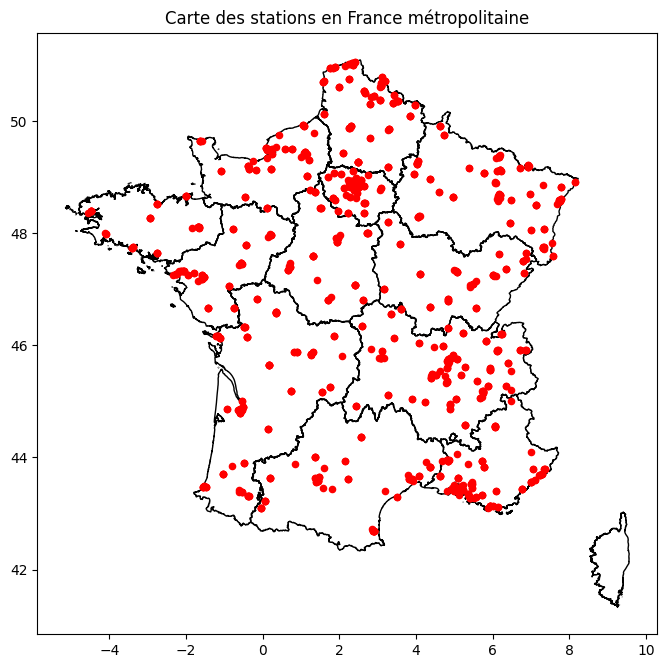

In [30]:
import geopandas as gpd
from cartiflette import carti_download
import matplotlib.pyplot as plt

france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

geodair_gdf = gpd.GeoDataFrame(
    geodair_metro,
    geometry=gpd.points_from_xy(geodair_metro["Longitude"], geodair_metro["Latitude"]),
    crs="EPSG:4326"
)

ax = france.plot(figsize=(8,8), edgecolor="black", facecolor="none")
geodair_gdf.plot(ax=ax, color="red", markersize=20)

plt.title("Carte des stations en France métropolitaine")
plt.show()



Carte des villes où se trouvent des stations

In [ ]:
import geopandas as gpd
from cartiflette import carti_download
import matplotlib.pyplot as plt

france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

geodair_metro_villes = geodair_metro.groupb_by

geodair_gdf = gpd.GeoDataFrame(
    geodair_metro,
    geometry=gpd.points_from_xy(geodair_metro["Longitude ville"], geodair_metro["Latitude ville"]),
    crs="EPSG:4326"
)

ax = france.plot(figsize=(8,8), edgecolor="black", facecolor="none")
geodair_gdf.plot(ax=ax, color="red", markersize=20)

plt.title("Carte des villes de France métropolitaine considérées")
plt.show()